Autores:

Autor 1: Matias Cartes Rivera, matias.cartes2001@alumnos.ubiobio.cl

Autor 2: Juan Carlos Francisco Poveda, juan.francisco2001@alumnos.ubiobio.cl

Profesora: Jazna Patricia Meza Hidalgo

Materia: Inteligencia Artificial

Entrega numero 5.

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

2025-07-30 22:39:43.047267: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-30 22:39:43.050637: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-30 22:39:43.059104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753929583.072498  197637 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753929583.076340  197637 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753929583.089408  197637 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

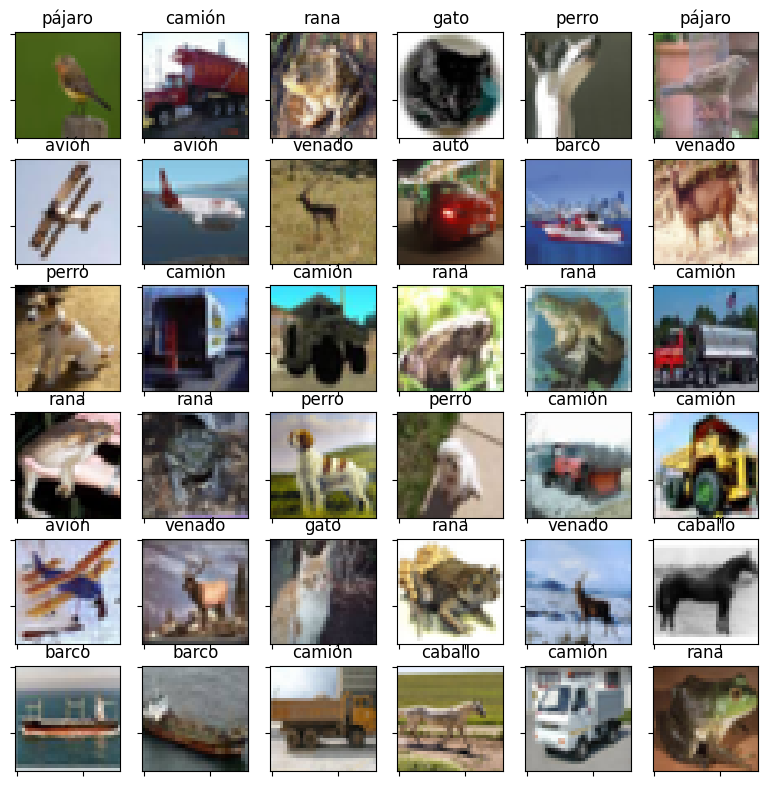

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

2025-07-30 22:39:48.273350: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrena la red
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2882 - loss: 1.9997 - val_accuracy: 0.3145 - val_loss: 1.8968
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3593 - loss: 1.8171 - val_accuracy: 0.3539 - val_loss: 1.7939
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3860 - loss: 1.7429 - val_accuracy: 0.3864 - val_loss: 1.7262
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4049 - loss: 1.6901 - val_accuracy: 0.4027 - val_loss: 1.6808
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4207 - loss: 1.6472 - val_accuracy: 0.4190 - val_loss: 1.6431


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

#### Experimento 2 - 1 punto

In [17]:
h1 = 2048
h2 = 1024
h3 = 512
h4 = 512
h5 = 256
h6 = 128

red_2 = keras.Sequential(name="Red_Evaluacion_Experimento2")
red_2.add(keras.layers.Input(shape=(N,), name='entrada'))
red_2.add(keras.layers.Dense(h1, activation='relu', name="Capa_1"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_2"))
red_2.add(keras.layers.Dense(h2, activation='relu', name="Capa_3"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_4"))
red_2.add(keras.layers.Dense(h3, activation='relu', name="Capa_5"))
red_2.add(keras.layers.Dense(h5, activation='relu', name="Capa_6"))
red_2.add(keras.layers.Dense(h5, activation='relu', name="Capa_7"))
red_2.add(keras.layers.Dense(h6, activation='relu', name="Capa_8"))
red_2.add(keras.layers.Dense(C, activation='softmax', name="Cap4_s4lida"))
red_2.summary()

red_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion_Experimento2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_1 (Dense)                  │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_2 (Dense)                  │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_3 (Dense)                  │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_4 (Dense)                  │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_5 (Dense)                  │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_6 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_7 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_8 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Cap4_s4lida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,460,042 (39.90 MB)

 Trainable params: 10,460,042 (39.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrena la red
num_epocas = 50
x_batch_size = 128
history = red_2.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2264 - loss: 2.1094 - val_accuracy: 0.2452 - val_loss: 2.0197
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3282 - loss: 1.8739 - val_accuracy: 0.3278 - val_loss: 1.8701
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3669 - loss: 1.7692 - val_accuracy: 0.3668 - val_loss: 1.7660
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3934 - loss: 1.6954 - val_accuracy: 0.3846 - val_loss: 1.7170
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4164 - loss: 1.6371 - val_accuracy: 0.4021 - val_loss: 1.6676
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4337 - loss: 1.5895 - val_accuracy: 0.4202 - val_loss: 1.6213
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4477 - loss: 1.5477 - val_accuracy: 0.4306 - val_loss: 1.5890
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.4623 - loss: 1.5093 - 

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto

#### Red experimento 2 - 1 punto

## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

### Mostrar curvas de entrenamiento/validación - 0,1 puntos



---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Incumplimiento de rendimiento exigido - 50% de la calificación final

---